# A walk through of some dirty data from XYZ Corporation.

In [1]:
# The real world has dirty data and we must know how to review it,
# understand its problems, and clean or fix it.

In [2]:
# Import packages we need for this lesson.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## We need to tell JupyterLab to run Matplotlib inline otherwise figures will not appear in the cells.
%matplotlib inline 
import seaborn as sns
import os

ModuleNotFoundError: No module named 'pandas'

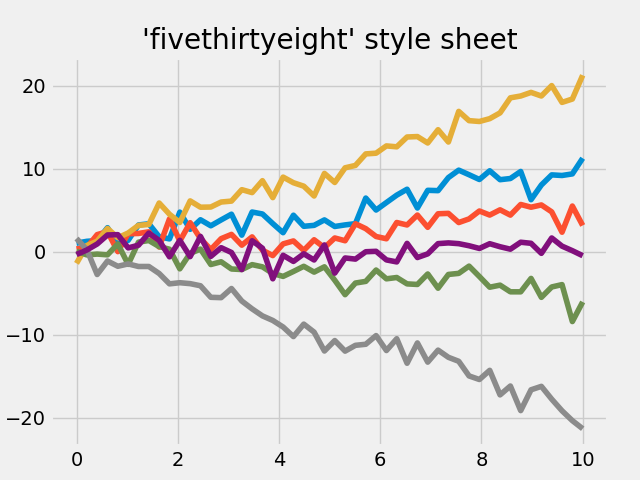

In [4]:
# Set a style sheet for Matplotlib
plt.style.use('fivethirtyeight') # https://matplotlib.org/3.5.0/gallery/style_sheets/fivethirtyeight.html
from IPython import display
display.Image(os.path.normpath("Artwork/fivethirtyeight.png"))

In [16]:
# Load a very large file of data - WARNING: THIS WILL TAKE A FEW SECONDS
data = pd.read_table(os.path.normpath('Data/XYZCorp_LendingData_small.txt'), parse_dates=['issue_d'], low_memory=False)

In [17]:
# We have a lot columns and need to see all of them.
# Pandas has a default value which is less than the 
# number of columns we have.
pd.set_option('display.max_columns', None)

In [18]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
data.shape

(39540, 73)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39540 entries, 0 to 39539
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           39540 non-null  int64         
 1   member_id                    39540 non-null  int64         
 2   loan_amnt                    39540 non-null  float64       
 3   funded_amnt                  39540 non-null  float64       
 4   funded_amnt_inv              39540 non-null  float64       
 5   term                         39540 non-null  object        
 6   int_rate                     39540 non-null  float64       
 7   installment                  39540 non-null  float64       
 8   grade                        39540 non-null  object        
 9   sub_grade                    39540 non-null  object        
 10  emp_title                    37095 non-null  object        
 11  emp_length                   38466 non-nu

<AxesSubplot:>

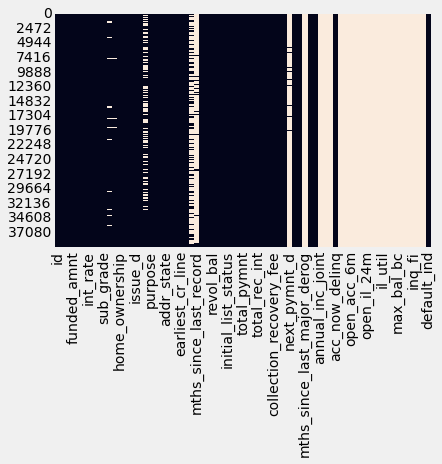

In [21]:
# We can see holes in the data using a heat map.
sns.heatmap(data.isnull(), cbar=False)

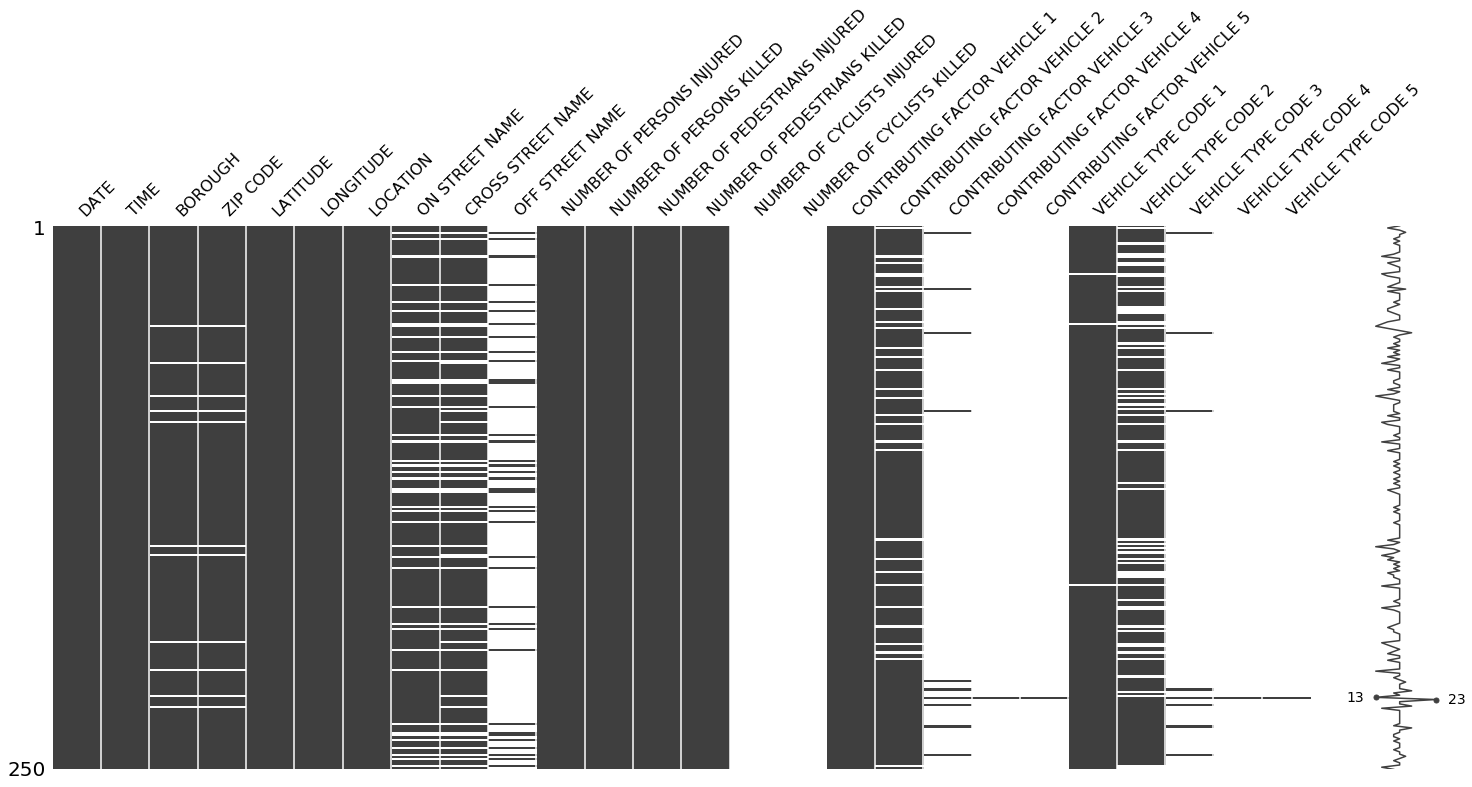

In [22]:
# <issingno is a good package for exploring and visualizing missing values
# https://pypi.org/project/missingno/
# https://github.com/ResidentMario/missingno
from IPython import display
display.Image(os.path.normpath("Artwork/missingno_example.png"))
#import missingno as msno
#msno.matrix(example_data)

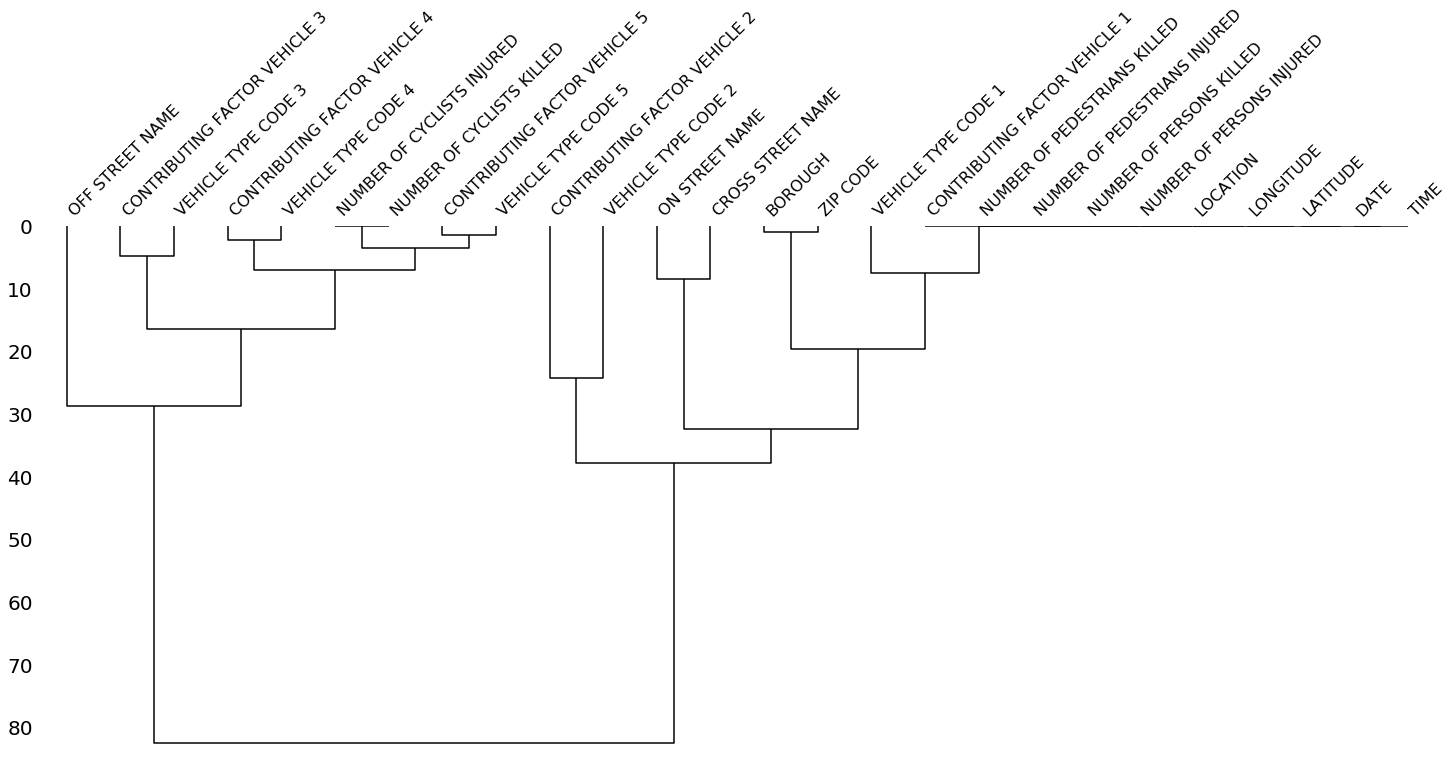

In [12]:
# The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against 
# one another by their nullity correlation (measured in terms of binary distance). At each step of the 
# tree the variables are split up based on which combination minimizes the distance of the remaining 
# clusters. The more monotone the set of variables, the closer their total distance is to zero, and 
# the closer their average distance (the y-axis) is to zero.
# https://github.com/ResidentMario/missingno
#msno.dendrogram(collisions)
display.Image(os.path.normpath("Artwork/missingno_example2.png"))

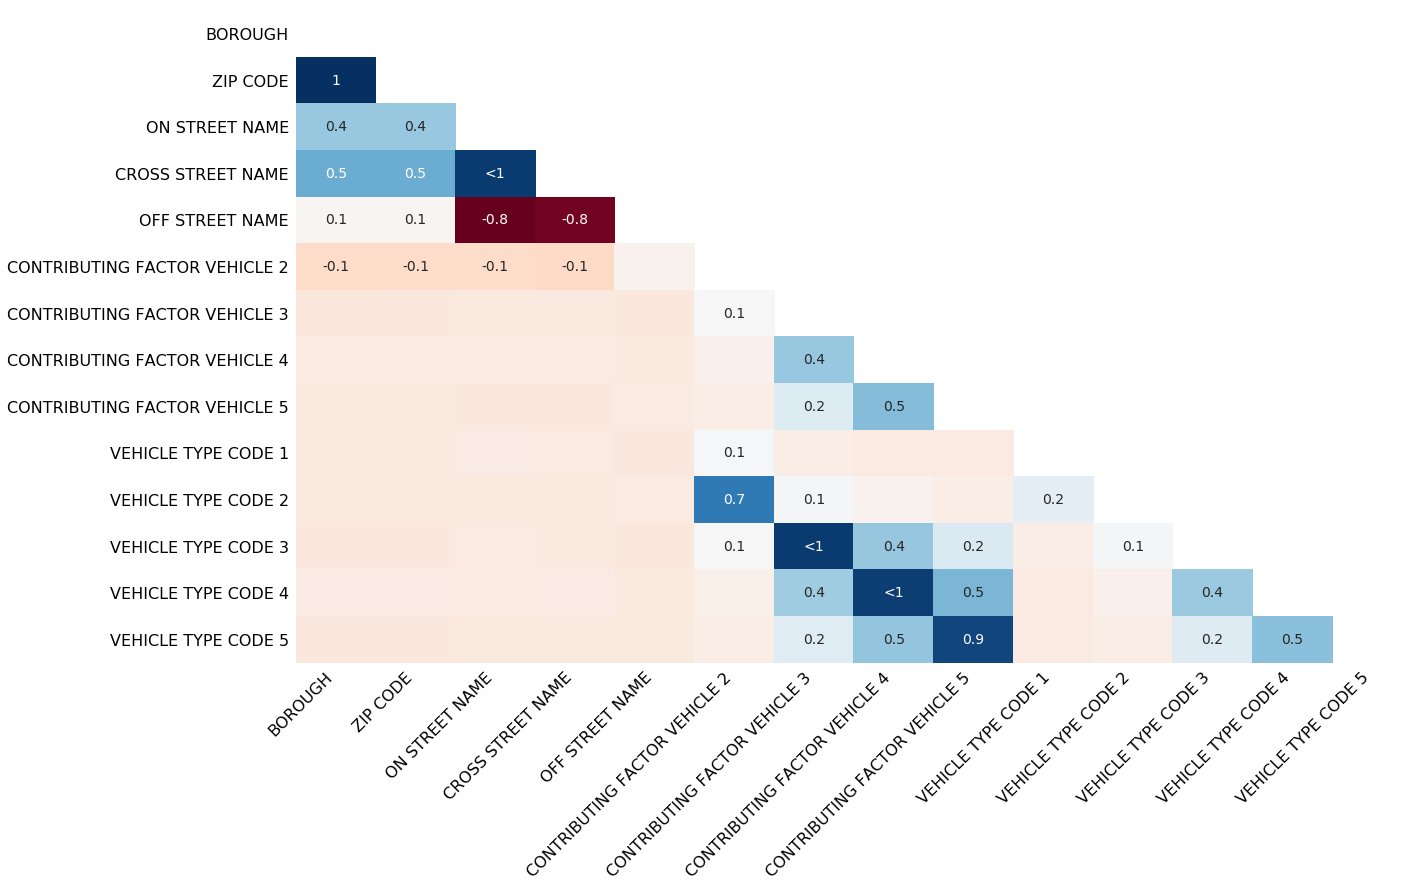

In [13]:
# The missingno correlation heatmap measures nullity correlation: how strongly the 
# presence or absence of one variable affects the presence of another:
#msno.heatmap(collisions)
display.Image(os.path.normpath("Artwork/missingno_example3.png"))

# Data Cleaning

In [14]:
df = pd.DataFrame.from_dict({
    'Name': ['Nik', 'Kate', 'Evan', 'Kyra', np.NaN],
    'Age': [33, 32, 40, 57, np.NaN],
    'Location': ['Toronto', 'London', 'New York', np.NaN, np.NaN]
})
print(df)

   Name   Age  Location
0   Nik  33.0   Toronto
1  Kate  32.0    London
2  Evan  40.0  New York
3  Kyra  57.0       NaN
4   NaN   NaN       NaN


In [15]:
# Make a copy for later.
df2 = df.copy()

# Reference notes on copying a dataframe - shallow versus deep copying.

# DataFrame.copy(deep=True)
# Make a copy of this object’s indices and data.
# When deep=True (default), a new object will be created with a copy of the calling object’s 
# data and indices. Modifications to the data or indices of the copy will not be reflected 
# in the original object (see notes below).

# When deep=False, a new object will be created without copying the calling object’s data or 
# index (only references to the data and index are copied). Any changes to the data of the 
# original will be reflected in the shallow copy (and vice versa).

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

In [ ]:
# Exploring the .isnull() method
print(df.isnull())

In [ ]:
# Sum the columns for nulls and print their values.
print(df.isnull().sum())

In [ ]:
# Exploring the Pandas .dropna() method
df.dropna(
    axis=0,         # Whether to drop rows or columns
    how='any',      # Whether to drop records if 'all' or 'any' records are missing
    thresh=None,    # How many columns/rows must be missing to drop
    subset=None,    # Which rows/columns to consider
    inplace=False   # Whether to drop in place (i.e., without needing to re-assign)
)

# The above settings are the default
df = df.dropna()
print(df)

In [ ]:
# Dropping records only if All values are Missing
df2 = df2.dropna(how='all')
print(df2)

In [ ]:
# Data may have holes in it with NaN.
# Using .fillna() to Fill Missing Data
df2 = df2.fillna(0)
print(df2)

## Data Imputation

In [ ]:
# First, lets add another record.
# df2 = df2.append({'Name':'Elwood', 'Age':np.NaN, 'Location':'Chicago'}, ignore_index = True)
# The above has been deprecated.
temp = pd.DataFrame([['Elwood', np.NaN, 'Chicago']],
                   columns=['Name', 'Age', 'Location'])

df2 = pd.concat([df2, temp], axis=0)
df2

In [ ]:
# Impute the data
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())
print(df2)

In [ ]:
# Add two identical records.
#df2 = df2.append({'Name':'Tina', 'Age':56, 'Location':'Tampa'}, ignore_index = True)
#df2 = df2.append({'Name':'Tina', 'Age':56, 'Location':'Tampa'}, ignore_index = True)

temp = pd.DataFrame([['Tina', 56, 'Tampa']],
                   columns=['Name', 'Age', 'Location'])

df2 = pd.concat([df2, temp, temp], axis=0)
df2

## Remove duplicate rows

In [ ]:
# Show whre the duplicates are located.
print(df2.duplicated())

In [ ]:
# Count the duplicate records
print(df2.duplicated().sum())

In [ ]:
# Drop the duplicates
df2 = df2.drop_duplicates(
    subset=None,            # Which columns to consider 
    keep='first',           # Which duplicate record to keep
    inplace=False          # Whether to drop in place
)
print(df2)